### Notebook Imports and Packages

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

%matplotlib inline

### Data Viz with 3D Charts

### Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [31]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1 / (r+1)

In [32]:
# Make our x and y data
x_1 = np.linspace(start=-2, stop=2, num=200)
y_1 = np.linspace(start=-2, stop=2, num=200)

# Transform x_1 and y_1 in two 2-dimensional arrays
x_1, y_1 = np.meshgrid(x_1, y_1)

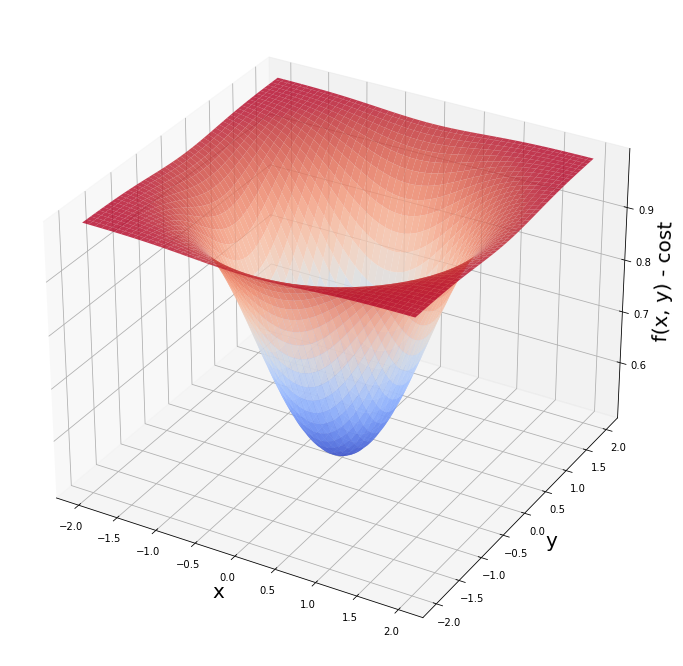

In [33]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') # gca stands for get current axis

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_1, y_1, f(x_1, y_1), cmap=cm.coolwarm, alpha=0.8)

plt.show()

### Partial Derivatives & Symbolic Computation

### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1\right)^2}$$

### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1\right)^2}$$

In [34]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is:', f(a, b))
print('Partial derivative with respect to x is', diff(f(a,b), a))
# Check de cost for the point (1.8, 1.0) 
print('Value of f(x,y) at x=1.8 y=1.0 is:', 
      f(a,b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary (a and b are the keys, 1.8 and 1.0 are the values)
print('Value of partial derivative with respect to x at x=1.8 y=1.0 is:', 
      diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative with respect to x is 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of partial derivative with respect to x at x=1.8 y=1.0 is: 0.0368089716197505


### Batch Gradient Descent with SymPy

In [35]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]}) # x slope
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]}) # y slope
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of: 0.000793898510134722
Minimum occurs at y value of: 0.000441054727852623
The cost is: 0.500000226534985


### Batch Gradient Descent without SymPy
### (much faster without having to run for each iteration the diff function)

In [36]:
# Partial Derivative functions
def fpx(x,y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r/(r + 1)**2

def fpy(x,y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r/(r + 1)**2

In [37]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x =  fpx(params[0], params[1]) # x slope
    gradient_y =  fpy(params[0], params[1]) # y slope
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of: 0.0007938985101347202
Minimum occurs at y value of: 0.0004410547278526219
The cost is: 0.5000002265349848


### Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [42]:
# Advanced Numpy Array Practice:
kirk = np.array([['Captain', 'Guitar']])
#print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['QuestLove', 'Drums']])
#print(hs_band.shape)

#print('hs_band[0]    :', hs_band[0])
#print('hs_band[1][0] :', hs_band[1][0])

# axis = 0 means add values as a new row
# if axis = 1 it would add values as a new column
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
#print(the_roots)

# print all rows of the first column
#print('\nPrinting nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
#print('\nPrinting band roles...', the_roots[:, 1])

In [43]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)

for n in range(max_iter):
    gradient_x =  fpx(params[0], params[1]) # x slope
    gradient_y =  fpy(params[0], params[1]) # y slope
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(arr=values_array, values=params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of: 0.0007938985101347202
Minimum occurs at y value of: 0.0004410547278526219
The cost is: 0.5000002265349848


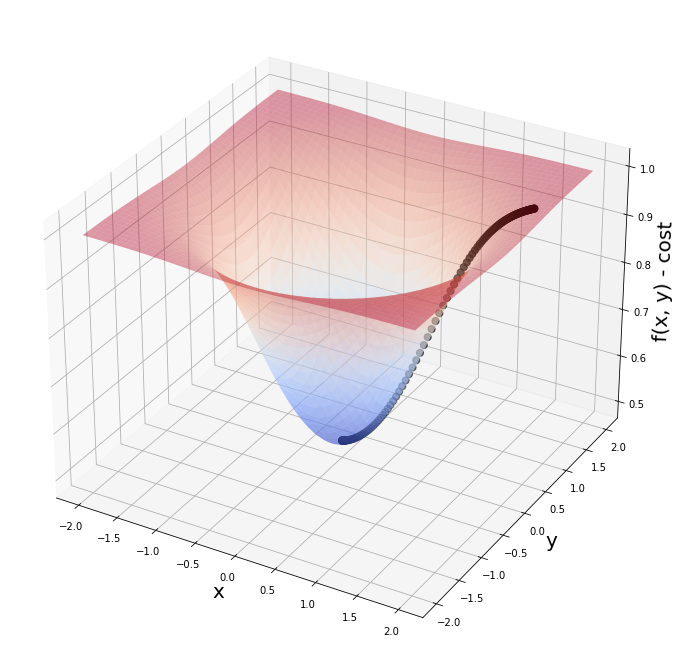

In [40]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') # gca stands for get current axis

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_1, y_1, f(x_1, y_1), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='black')

plt.show()